In [1]:

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_labels[0]


1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam", 
              loss="MSE",
              metrics=["accuracy"])

Validate the approach 

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 8s 116ms/step - loss: 0.1149 - accuracy: 0.8450 - val_loss: 0.0866 - val_accuracy: 0.8840
Epoch 2/20
59/59 [==============================] - 4s 60ms/step - loss: 0.0516 - accuracy: 0.9386 - val_loss: 0.0854 - val_accuracy: 0.8837
Epoch 3/20
59/59 [==============================] - 4s 68ms/step - loss: 0.0324 - accuracy: 0.9661 - val_loss: 0.0930 - val_accuracy: 0.8735
Epoch 4/20
59/59 [==============================] - 4s 73ms/step - loss: 0.0228 - accuracy: 0.9787 - val_loss: 0.0944 - val_accuracy: 0.8739
Epoch 5/20
59/59 [==============================] - 4s 66ms/step - loss: 0.0155 - accuracy: 0.9872 - val_loss: 0.0989 - val_accuracy: 0.8728
Epoch 6/20
59/59 [==============================] - 4s 68ms/step - loss: 0.0111 - accuracy: 0.9915 - val_loss: 0.1036 - val_accuracy: 0.8689
Epoch 7/20
59/59 [==============================] - 4s 68ms/step - loss: 0.0086 - accuracy: 0.9929 - val_loss: 0.1057 - val_accuracy: 0.8662
Epoch 8/20
5

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

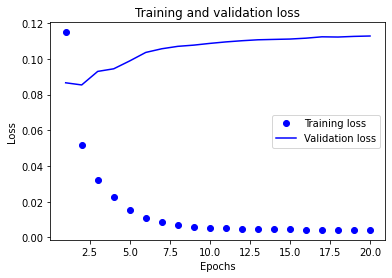

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

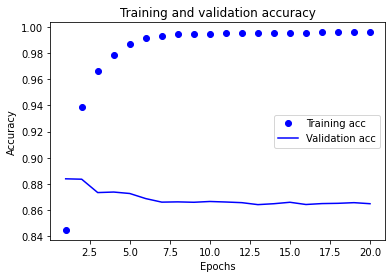

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [15]:
results= model.evaluate(x_test, y_test)


782/782 [==============================] - 4s 5ms/step - loss: 0.1236 - accuracy: 0.8518


In [16]:
results

[0.12357378005981445, 0.8517600297927856]

Combining all code together along with dropout layer

Epoch 1/20
59/59 [==============================] - 7s 100ms/step - loss: 8.6346 - accuracy: 0.8194 - val_loss: 4.9300 - val_accuracy: 0.8745
Epoch 2/20
59/59 [==============================] - 4s 71ms/step - loss: 2.6080 - accuracy: 0.9248 - val_loss: 0.8581 - val_accuracy: 0.8880
Epoch 3/20
59/59 [==============================] - 4s 70ms/step - loss: 0.3042 - accuracy: 0.9475 - val_loss: 0.1598 - val_accuracy: 0.8879
Epoch 4/20
59/59 [==============================] - 5s 93ms/step - loss: 0.1127 - accuracy: 0.9555 - val_loss: 0.1412 - val_accuracy: 0.8880
Epoch 5/20
59/59 [==============================] - 4s 60ms/step - loss: 0.0961 - accuracy: 0.9634 - val_loss: 0.1381 - val_accuracy: 0.8861
Epoch 6/20
59/59 [==============================] - 4s 63ms/step - loss: 0.0843 - accuracy: 0.9709 - val_loss: 0.1409 - val_accuracy: 0.8819
Epoch 7/20
59/59 [==============================] - 5s 93ms/step - loss: 0.0776 - accuracy: 0.9773 - val_loss: 0.1365 - val_accuracy: 0.8827
Epoch 8/20
5

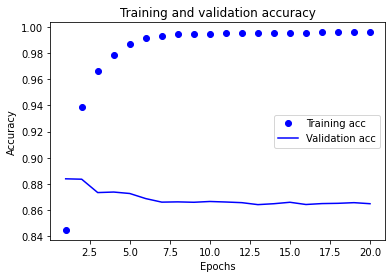

782/782 [==============================] - 4s 5ms/step - loss: 0.1861 - accuracy: 0.8544


[0.18611685931682587, 0.8544399738311768]

In [17]:
# Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 1 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(128,activation='tanh')) 
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(128,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="MSE",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(x_test, y_test)
results